In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV, LassoCV, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV

import warnings
warnings.filterwarnings('ignore')




In [ ]:
home_data = pd.read_csv('C:\\Users\\shgupta\\OneDrive - Five9\\Desktop\\analytica\\train.csv')

In [18]:

home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#Selecting data for modeeling - Select Data Variable

home_data = pd.read_csv('C:\\Users\\shgupta\\OneDrive - Five9\\Desktop\\analytica\\train.csv')
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

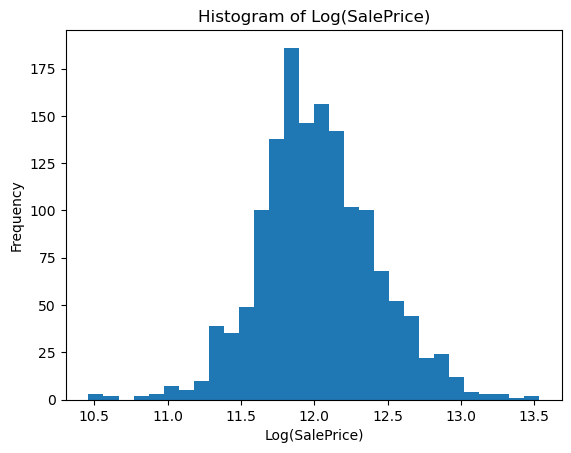

In [26]:

# Apply logarithmic transformation to SalePrice column
home_data['SalePrice'] = np.log(home_data['SalePrice'])

# histogram of the transformed SalePrice column
plt.hist(home_data['SalePrice'], bins=30)
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.title('Histogram of Log(SalePrice)')
plt.show()


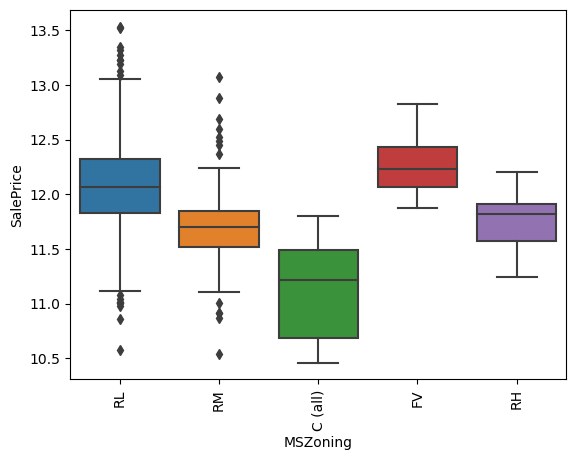

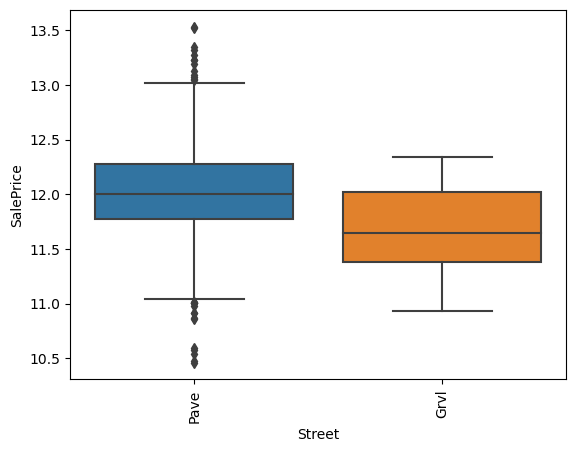

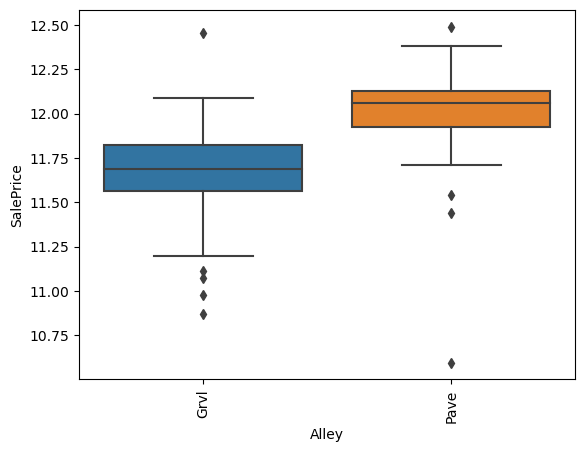

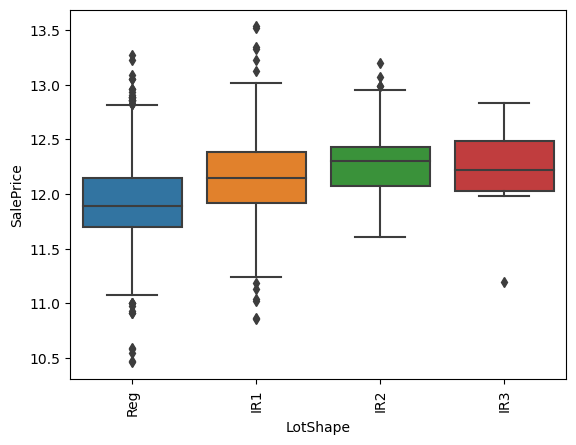

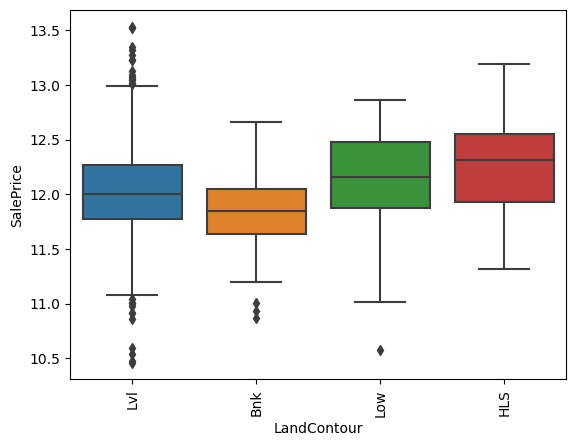

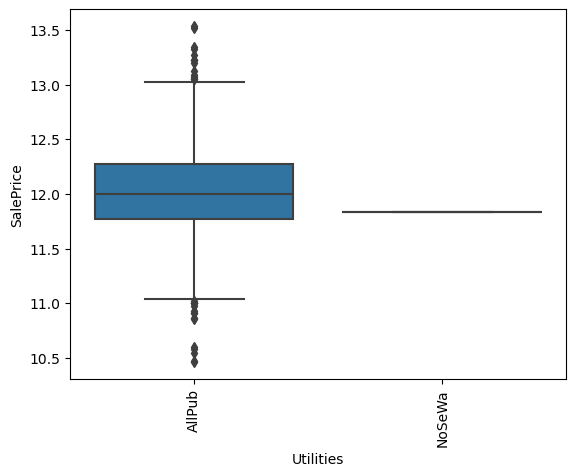

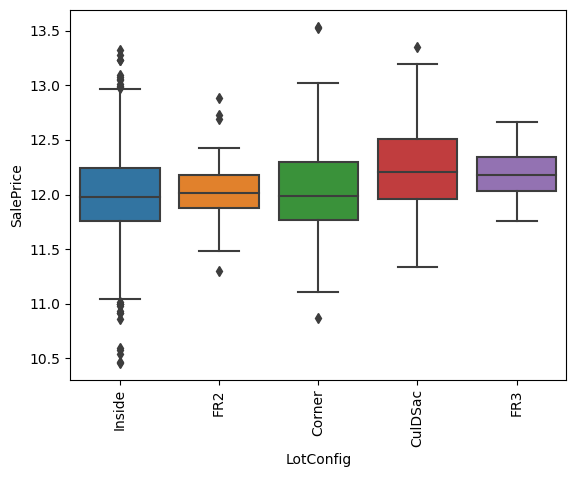

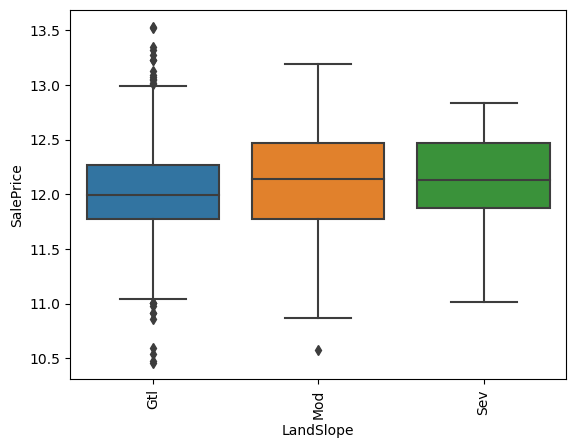

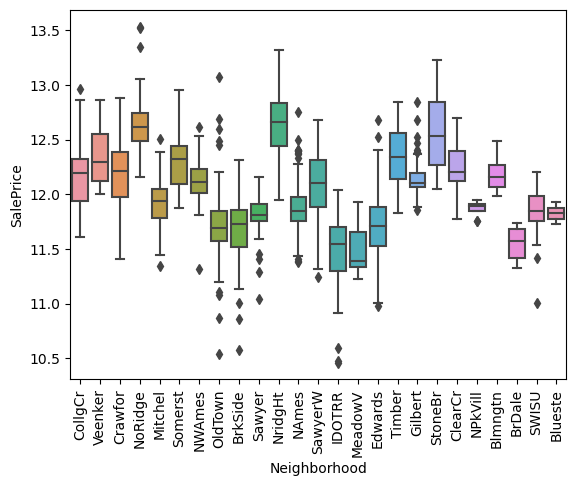

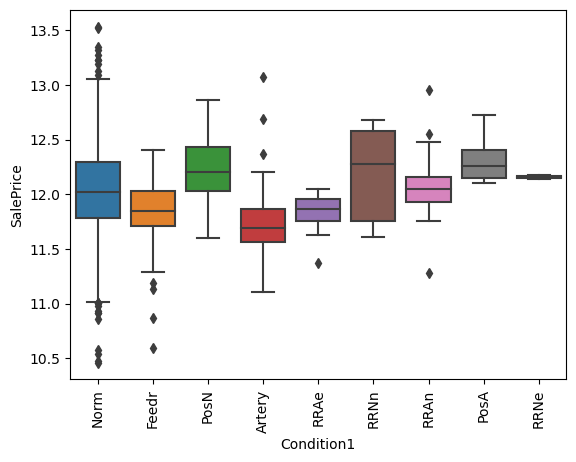

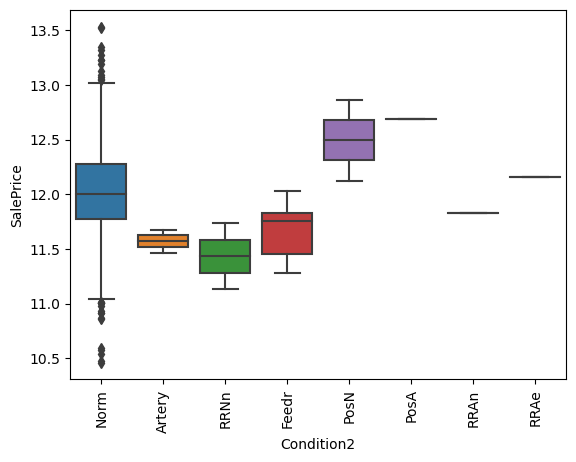

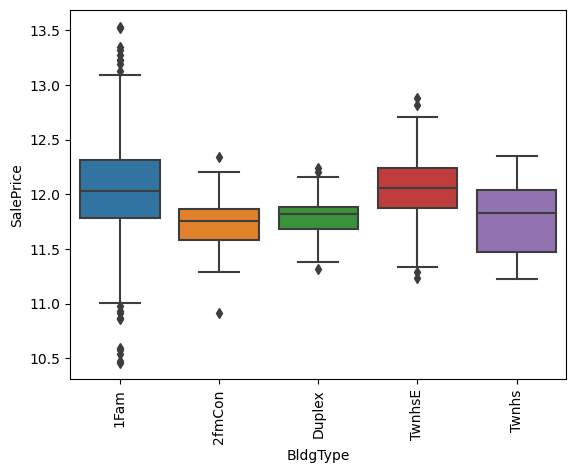

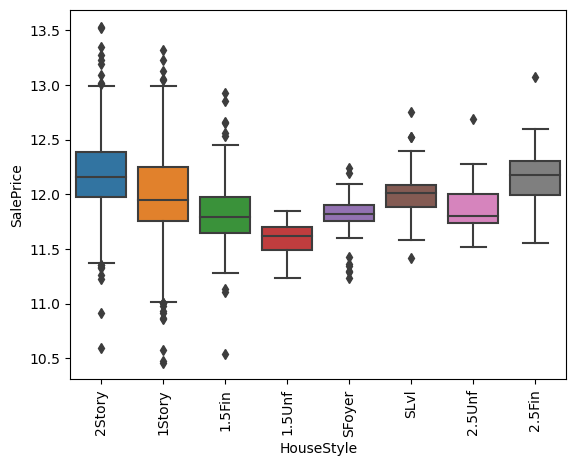

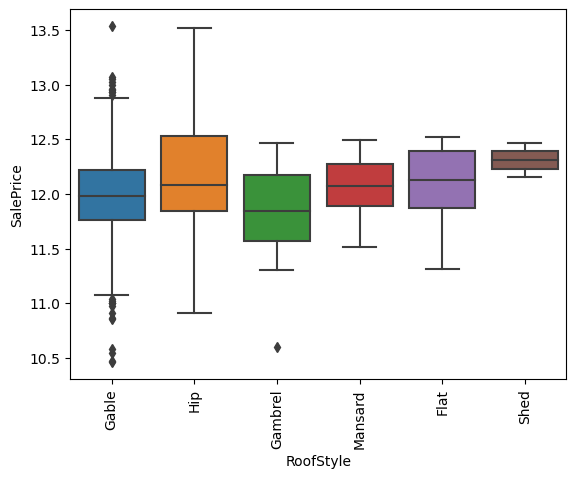

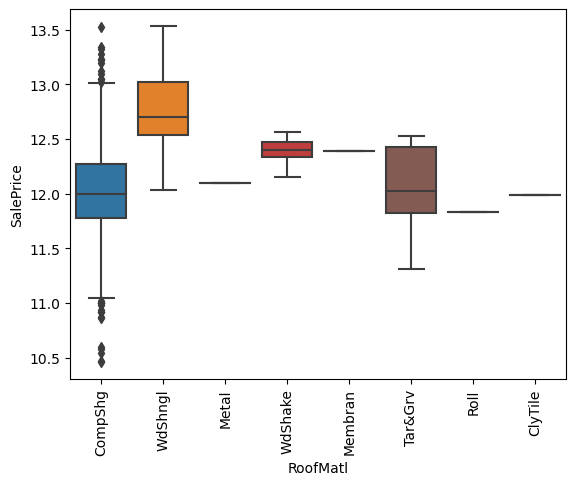

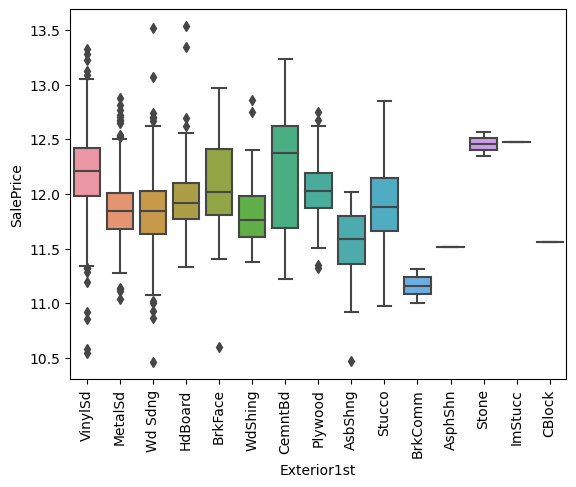

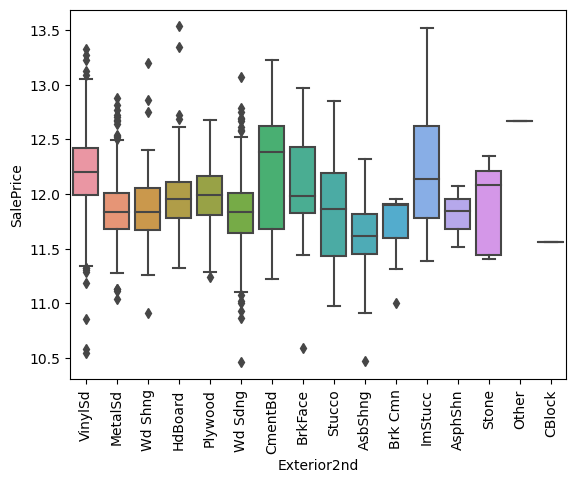

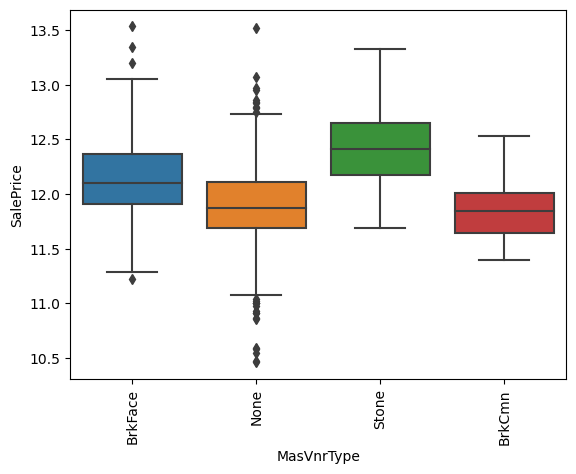

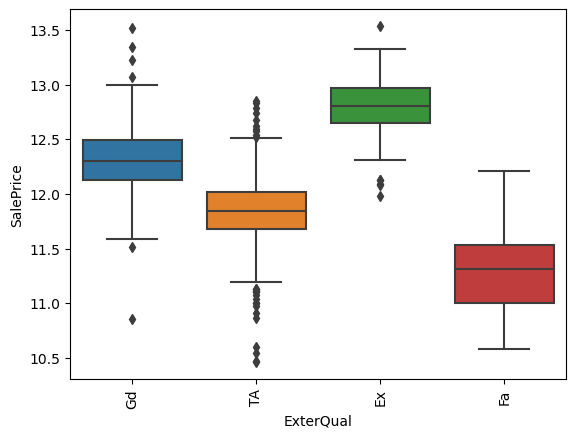

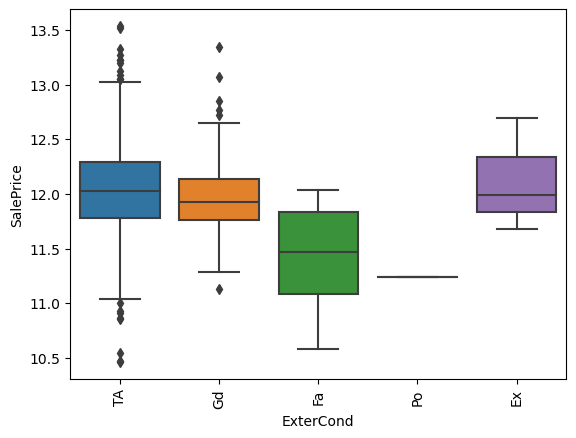

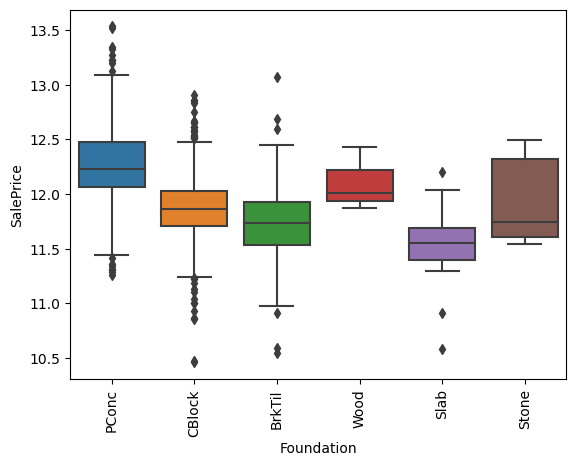

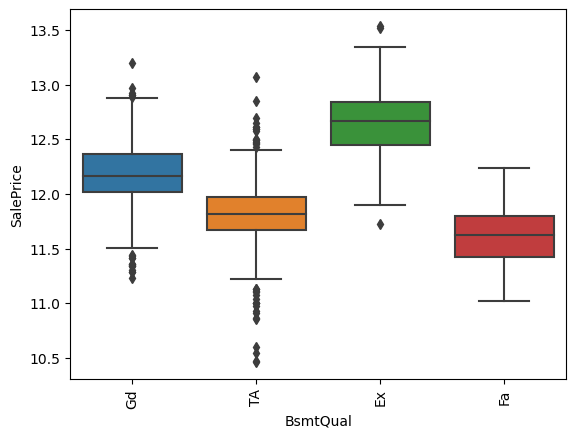

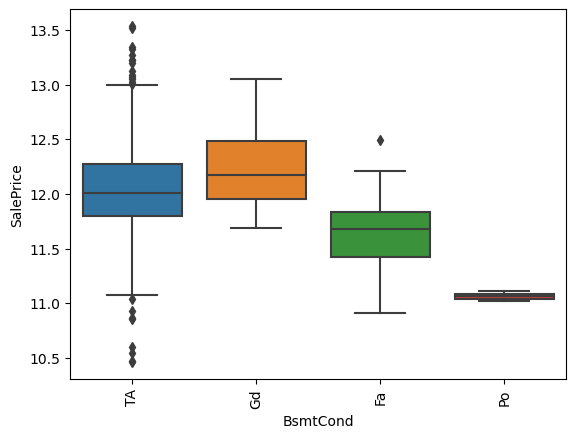

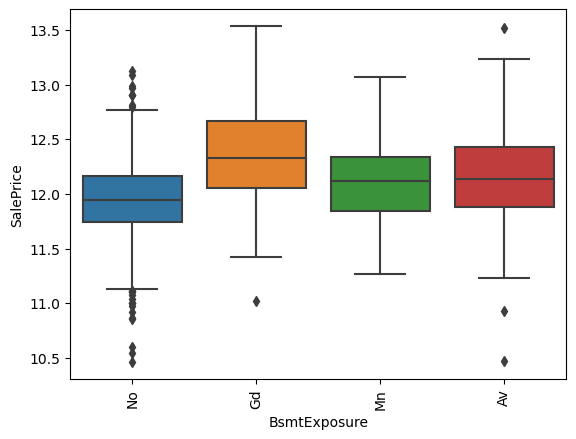

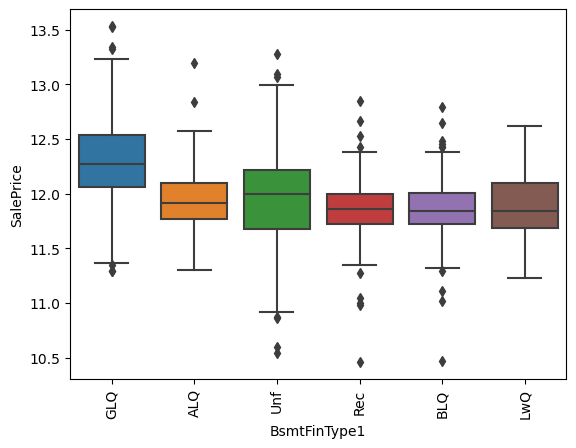

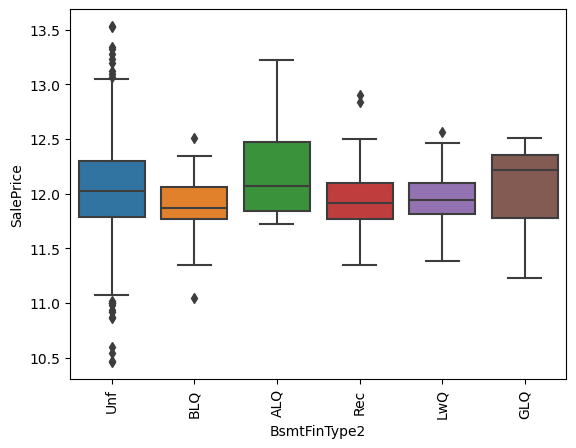

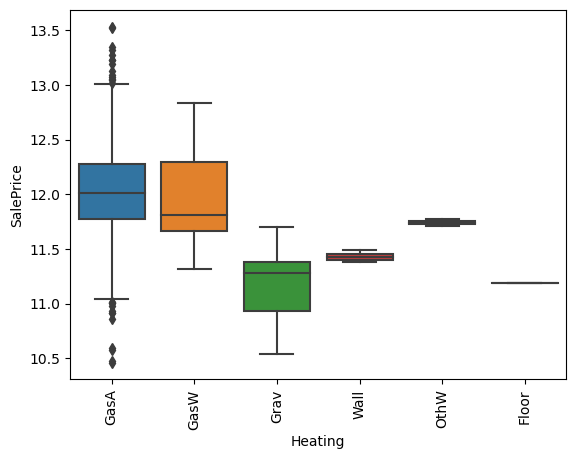

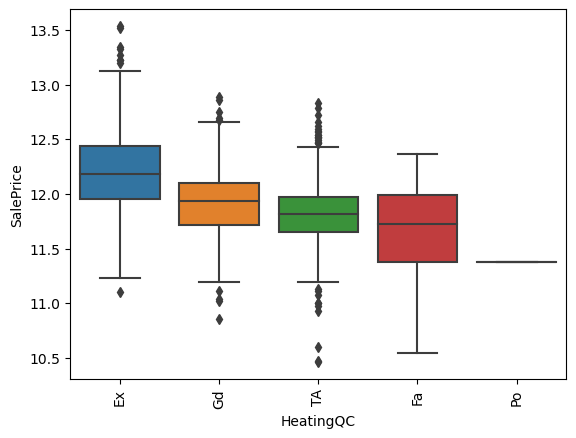

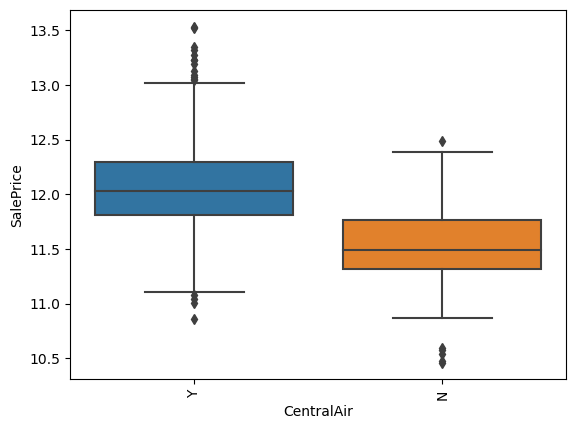

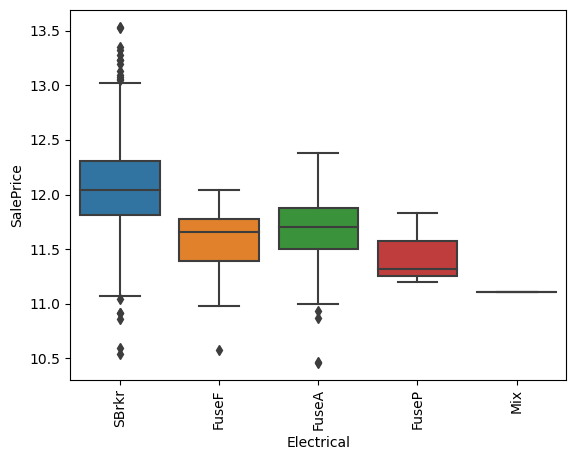

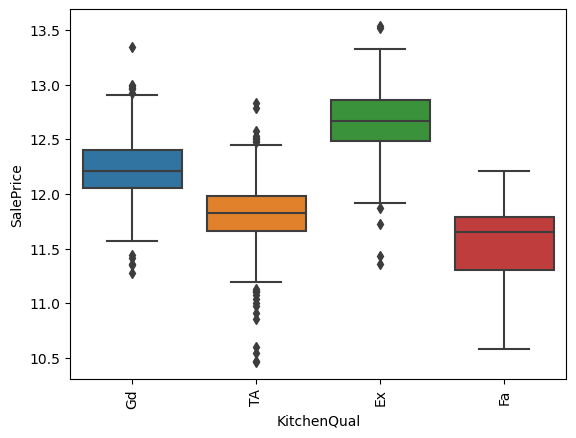

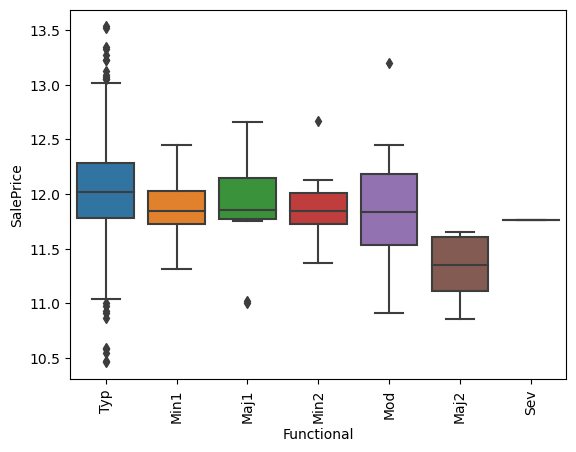

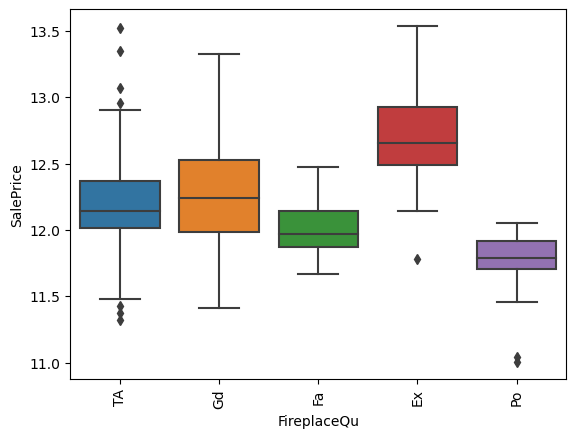

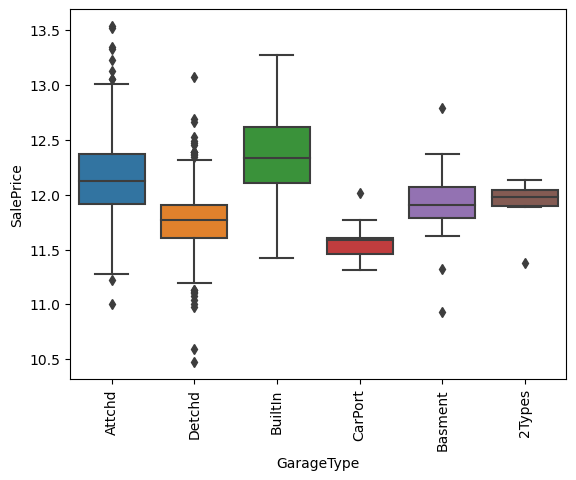

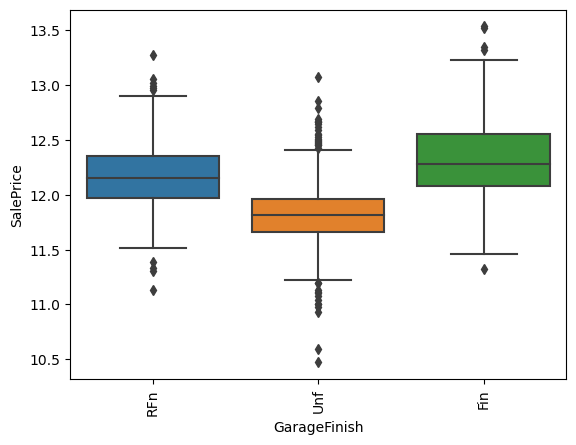

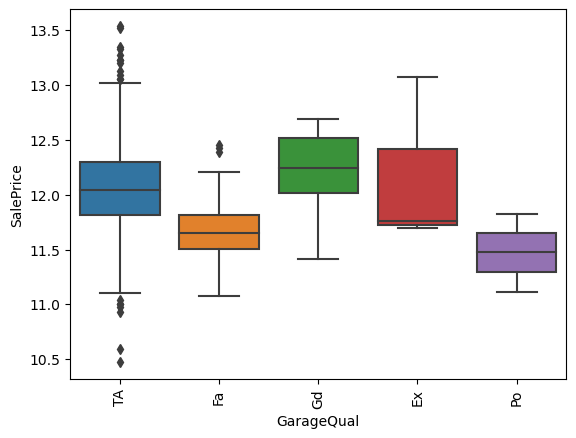

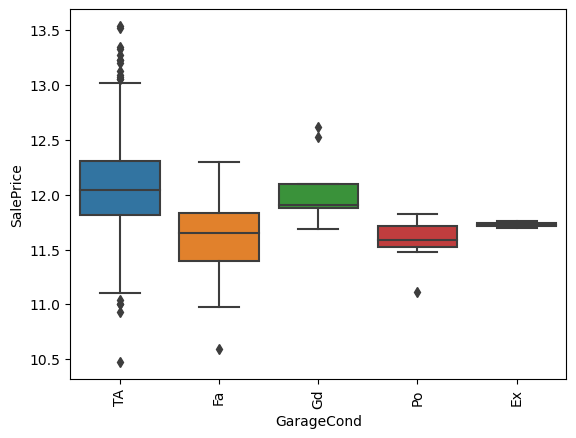

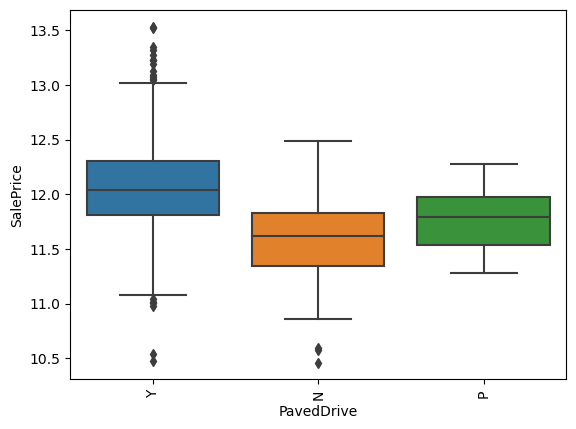

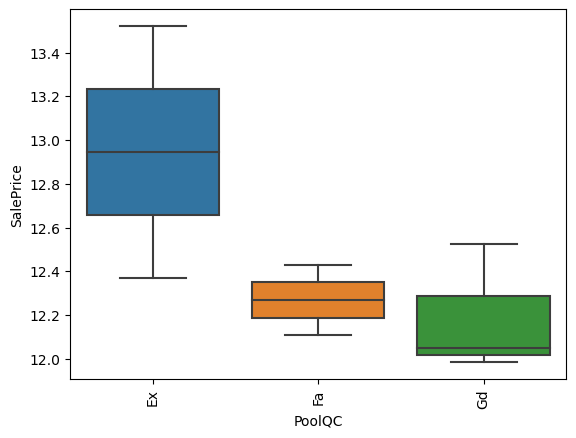

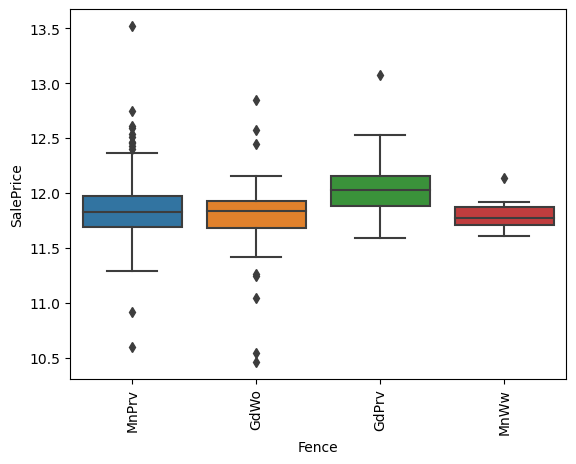

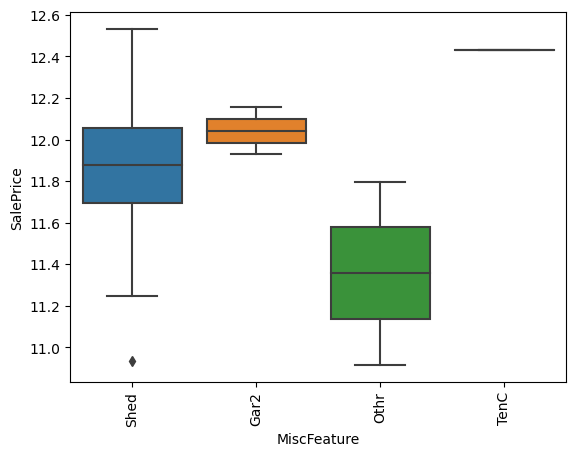

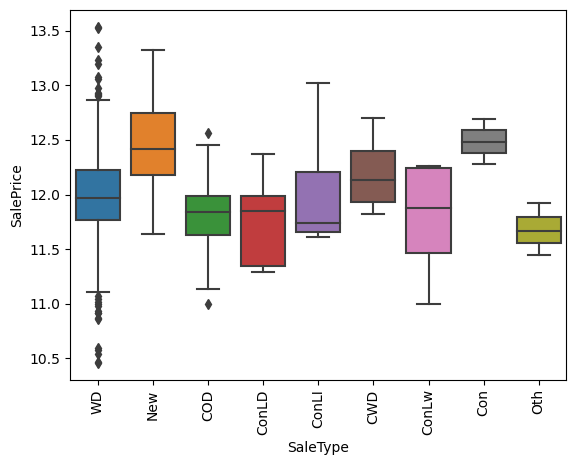

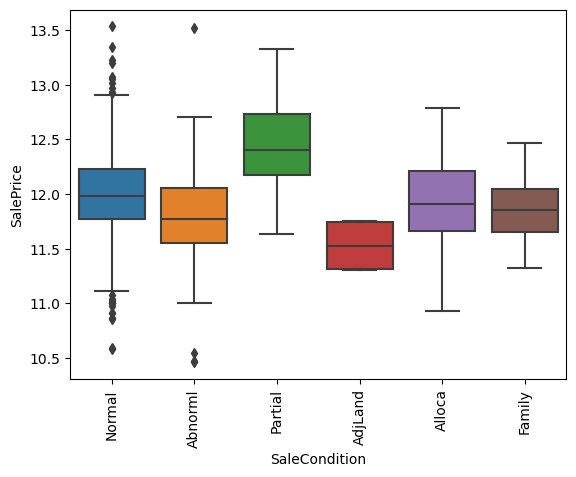

In [27]:

# create box plots for each categorical feature
categorical_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                    'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                    'SaleCondition']

for col in categorical_cols:
    sns.boxplot(x=col, y='SalePrice', data=home_data)
    plt.xticks(rotation=90)
    plt.show()

In [5]:

current_year = datetime.datetime.now().year
#1.Age of the house
home_data['Age'] = current_year - home_data['YearBuilt']
#2.total square footage
home_data['TotalLivingArea'] =home_data['GrLivArea'] + home_data['1stFlrSF'] + home_data['2ndFlrSF']
#3.room count
# Define a list of columns that represent rooms in the house
room_cols = ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'FullBath', 'HalfBath']

# Create a new feature that counts the total number of rooms in the house
home_data['TotalRooms'] = home_data[room_cols].sum(axis=1)
#4.year of last renovation
# Calculate the number of years since the last renovation
home_data['YearSinceLastUpdate'] = home_data['YearBuilt'] - home_data['YearRemodAdd']

# Replace negative values with 0
home_data['YearSinceLastUpdate'] = home_data['YearSinceLastUpdate'].apply(lambda x: max(x, 0))

# Convert the new feature to categorical
home_data['YearSinceLastUpdate'] = pd.cut(home_data['YearSinceLastUpdate'], bins=[0, 5, 10, 20, 50, 100, 150], 
                                   labels=['<5', '5-10', '10-20', '20-50', '50-100', '100-150'])
#5.lot size
home_data['Log Lot Area'] = np.log(home_data['LotArea'])

print(home_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neig

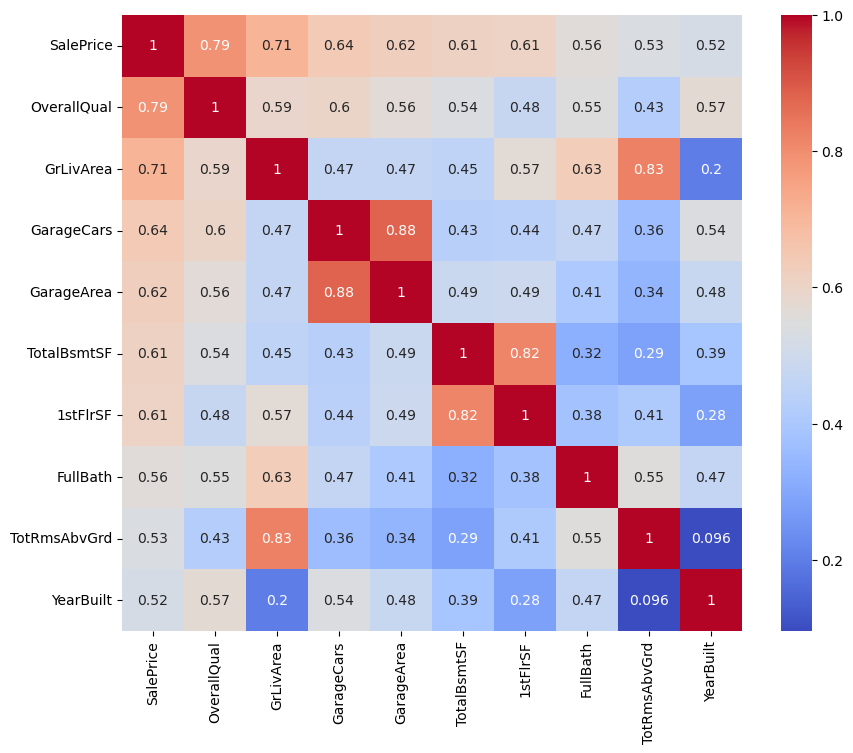

In [9]:

# compute the correlation matrix
corr = home_data.corr()

# select the top 10 columns with the highest correlation to 'SalePrice'
top_corr_cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
top_corr = home_data[top_corr_cols].corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr, annot=True, cmap='coolwarm')
plt.show()


0
Before imputation - Mean:  70.04995836802642  Median:  70.04995836802665
After imputation - Mean:  70.04995836802642  Median:  70.04995836802665


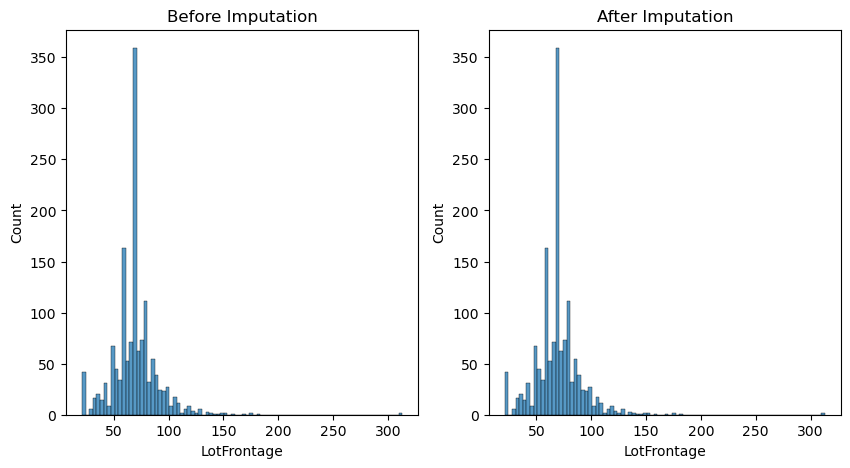

In [20]:
#Feature_Engineerng_Input_Missing_Valuess


# Checking the missing values in the 'LotFrontage' feature
print(home_data['LotFrontage'].isnull().sum()) # Output: 259

# Imputing the missing values with mean imputation
mean = home_data['LotFrontage'].mean()
home_data['LotFrontage'].fillna(mean, inplace=True)

# Checking the difference in the mean and median before and after the imputation
print("Before imputation - Mean: ", home_data['LotFrontage'].mean(), " Median: ", home_data['LotFrontage'].median())
lotfrontage_median = home_data['LotFrontage'].median()
home_data['LotFrontage'] = home_data['LotFrontage'].fillna(lotfrontage_median)
print("After imputation - Mean: ", home_data['LotFrontage'].mean(), " Median: ", home_data['LotFrontage'].median())

# Checking the distribution of the variable before and after the imputation
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(home_data['LotFrontage'], ax=axs[0])
axs[0].set_title('Before Imputation')

sns.histplot(home_data['LotFrontage'], ax=axs[1])
axs[1].set_title('After Imputation')

plt.show()

In [11]:
#feature_engineering_encoding_categorical_variables

# Selecting the categorical features
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Checking the shape of the data before encoding
print("Shape of data before encoding: ", home_data.shape)
print(home_data.head())
# One-hot encoding the categorical features
home_data = pd.get_dummies(home_data, columns=categorical_features)

# Checking the shape of the data after encoding
print("Shape of data after encoding: ", home_data.shape)
print(home_data.head())

Shape of data before encoding:  (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleC

In [28]:
#feature_engineering_featurescaling

# Define the columns to scale
columns_to_scale = ['LotArea', 'OverallQual', 'OverallCond']

# Create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Create a StandardScaler object
standard_scaler = StandardScaler()

# Scale the selected columns using MinMaxScaler and add them back to the dataframe
home_data_minmax = home_data.copy()
home_data_minmax[columns_to_scale] = minmax_scaler.fit_transform(home_data_minmax[columns_to_scale])

# Scale the selected columns using StandardScaler and add them back to the dataframe
home_data_standard = home_data.copy()
home_data_standard[columns_to_scale] = standard_scaler.fit_transform(home_data_standard[columns_to_scale])

# Print the scaled data
print("MinMaxScaler:\n", home_data_minmax[['LotArea', 'OverallQual', 'OverallCond']].head())
print("\nStandardScaler:\n", home_data_standard[['LotArea', 'OverallQual', 'OverallCond']].head())


MinMaxScaler:
     LotArea  OverallQual  OverallCond
0  0.033420     0.666667        0.500
1  0.038795     0.555556        0.875
2  0.046507     0.666667        0.500
3  0.038561     0.666667        0.500
4  0.060576     0.777778        0.500

StandardScaler:
     LotArea  OverallQual  OverallCond
0 -0.207142     0.651479    -0.517200
1 -0.091886    -0.071836     2.179628
2  0.073480     0.651479    -0.517200
3 -0.096897     0.651479    -0.517200
4  0.375148     1.374795    -0.517200


<AxesSubplot:>

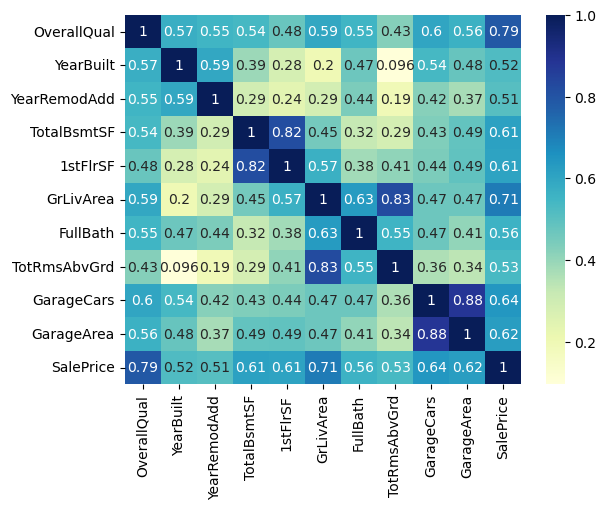

In [12]:
#feature_engineering_feature_selection_correlation_analysis


# select only the numeric features
numeric_features = home_data.select_dtypes(include=[np.number])

# calculate the correlation matrix
corr_matrix = numeric_features.corr()

# select the top 10 most correlated features with SalePrice
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]

# create a heatmap of the most correlated features
sns.heatmap(numeric_features[top_corr_features].corr(), annot=True, cmap="YlGnBu")

In [ ]:
it seems like the linear regression model is overfitting the data, as the training R^2 score is high but the test R^2 score is very low and negative. This suggests that the model is not able to generalize well to new data.

On the other hand, both the random forest and XGBoost models seem to be performing much better, with high training and test R^2 scores. The random forest model has a slightly lower test R^2 score than the XGBoost model, but it's still quite good.

Overall, it seems like the random forest and XGBoost models are the best performers 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Read in the data
home_data = pd.read_csv("C:\\Users\\shgupta\\OneDrive - Five9\\Documents\\Analytica\\train.csv")

# Perform mean imputation on missing values
home_data.fillna(home_data.mean(), inplace=True)


# Imputing the missing values with mean imputation
mean = home_data['LotFrontage'].mean()
home_data['LotFrontage'].fillna(mean, inplace=True)



lotfrontage_median = home_data['LotFrontage'].median()
home_data['LotFrontage'] = home_data['LotFrontage'].fillna(lotfrontage_median)


# Create a new feature for total square footage
home_data['TotalSF'] = home_data['TotalBsmtSF'] + home_data['1stFlrSF'] + home_data['2ndFlrSF']

# Selecting the categorical features
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# One-hot encoding the categorical features
home_data = pd.get_dummies(home_data, columns=categorical_features)

# Split the data into features and target variable
X = home_data.drop('SalePrice', axis=1)
y = home_data['SalePrice']

# Define the columns to scale
columns_to_scale = ['LotArea', 'OverallQual', 'OverallCond']

# Create a StandardScaler object
scaler = StandardScaler()
# Scale the selected columns using StandardScaler and add them back to the dataframe
home_data_standard = home_data.copy()
home_data_standard[columns_to_scale] = standard_scaler.fit_transform(home_data_standard[columns_to_scale])


# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fit a random forest regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Fit an XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the models
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)

# Print the R^2 scores
print("Linear Regression train R^2 score: ", lr_train_score)
print("Linear Regression test R^2 score: ", lr_test_score)
print("Random Forest train R^2 score: ", rf_train_score)
print("Random Forest test R^2 score: ", rf_test_score)
print("XGBoost train R^2 score: ", xgb_train_score)


Linear Regression train R^2 score:  0.9406971053215158
Linear Regression test R^2 score:  -1.7033847719448053e+24
Random Forest train R^2 score:  0.9757154142117693
Random Forest test R^2 score:  0.9027897527173792
XGBoost train R^2 score:  0.9998655602065417


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read in the data
home_data = pd.read_csv("C:\\Users\\shgupta\\OneDrive - Five9\\Documents\\Analytica\\train.csv")

# Exclude non-numeric columns from DataFrame before performing mean imputation
home_data_numeric = home_data.select_dtypes(include=[np.number])
home_data_numeric.fillna(home_data_numeric.mean(), inplace=True)


# Imputing the missing values with mean imputation
mean = home_data['LotFrontage'].mean()
home_data['LotFrontage'].fillna(mean, inplace=True)

# Create a new feature for total square footage
home_data['TotalSF'] = home_data['TotalBsmtSF'] + home_data['1stFlrSF'] + home_data['2ndFlrSF']

# Split the data into features and target variable
X = home_data.drop('SalePrice', axis=1)
y = home_data['SalePrice']

# One-hot encoding the categorical features
X = pd.get_dummies(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a random forest regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Fit an XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print("Random Forest test MSE: ", rf_mse)
print("Random Forest test MAE: ", rf_mae)
print("Random Forest test RMSE: ", rf_rmse)
print("Random Forest test R^2 score: ", rf_r2)

print("XGBoost test MSE: ", xgb_mse)
print("XGBoost test MAE: ", xgb_mae)
print("XGBoost test RMSE: ", xgb_rmse)
print("XGBoost test R^2 score: ", xgb_r2)


C:\Users\shgupta\AppData\Local\Temp\ipykernel_31244\1942649517.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  home_data.fillna(home_data.mean(), inplace=True)


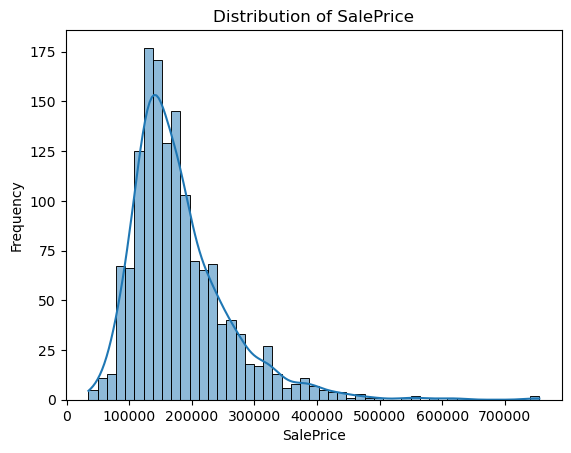

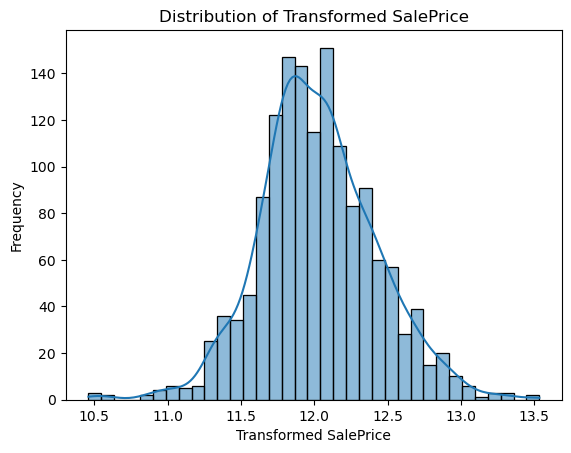

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read in the data
home_data = pd.read_csv("C:\\Users\\shgupta\\OneDrive - Five9\\Documents\\Analytica\\train.csv")

# Perform mean imputation on missing values
home_data.fillna(home_data.mean(), inplace=True)

# Imputing the missing values with mean imputation
mean = home_data['LotFrontage'].mean()
home_data['LotFrontage'].fillna(mean, inplace=True)

# Create a new feature for total square footage
home_data['TotalSF'] = home_data['TotalBsmtSF'] + home_data['1stFlrSF'] + home_data['2ndFlrSF']

# Visualize the distribution of the target variable
sns.histplot(home_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Transform the target variable using log transformation
home_data['SalePrice'] = np.log1p(home_data['SalePrice'])

# Visualize the distribution of the transformed target variable
sns.histplot(home_data['SalePrice'], kde=True)
plt.title('Distribution of Transformed SalePrice')
plt.xlabel('Transformed SalePrice')
plt.ylabel('Frequency')
plt.show()

# Split the data into features and target variable
X = home_data.drop('SalePrice', axis=1)
y = home_data['SalePrice']

# One-hot encoding the categorical features
X = pd.get_dummies(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the hyperparameter grid for the random forest model
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Set the hyperparameter grid for the XGBoost model
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
}

# Instantiate the models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Perform grid search to find the best hyperparameters for the random forest model
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train)

# Perform grid search to find the best hyperparameters for the XGBoost model
xgb_grid_search.fit(X_train, y_train)
y_pred_xgb_gs = xgb_grid_search.predict(X_test)
xgb_gs_mse = mean_squared_error(y_test, y_pred_xgb_gs)
xgb_gs_mae = mean_absolute_error(y_test, y_pred_xgb_gs)
xgb_gs_rmse = np.sqrt(xgb_gs_mse)
xgb_gs_r2 = r2_score(y_test, y_pred_xgb_gs)
print("XGBoost with GridSearchCV test MSE: ", xgb_gs_mse)
print("XGBoost with GridSearchCV test MAE: ", xgb_gs_mae)
print("XGBoost with GridSearchCV test RMSE: ", xgb_gs_rmse)
print("XGBoost with GridSearchCV test R^2 score: ", xgb_gs_r2)

                               
